# Import Modules

In [2]:
%matplotlib inline
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt
import pandas.plotting
import numpy as np
import hvplot.xarray 
import holoviews as hv
from mpl_toolkits.basemap import Basemap
import netCDF4
from netCDF4 import Dataset
import pandas as pd

# Read data from multiple files

In [3]:
path = "/scratch/globc/dcom/ARPEGE6_TUNE"
filename = "/PRE623TUN010*.nc"
file = xr.open_mfdataset(path+filename,concat_dim='ensemble',combine='nested')

In [4]:
nc = file['tall']
df = nc.to_dataframe()
df

tall
ensemble time       lat        lon                  
0        2005-01-16 -88.927734 0.00000    247.108078
                               1.40625    247.057388
                               2.81250    247.015579
                               4.21875    246.979385
                               5.62500    246.947083
...                                              ...
8        2014-12-17  88.927734 352.96875  240.924454
                               354.37500  240.930984
                               355.78125  240.937225
                               357.18750  240.943130
                               358.59375  240.948624

[35389440 rows x 1 columns]

# Compute climatology 

In [5]:
ds = df.reset_index(level=['time'])
ds

time        tall
ensemble lat        lon                             
0        -88.927734 0.00000   2005-01-16  247.108078
                    1.40625   2005-01-16  247.057388
                    2.81250   2005-01-16  247.015579
                    4.21875   2005-01-16  246.979385
                    5.62500   2005-01-16  246.947083
...                                  ...         ...
8         88.927734 352.96875 2014-12-17  240.924454
                    354.37500 2014-12-17  240.930984
                    355.78125 2014-12-17  240.937225
                    357.18750 2014-12-17  240.943130
                    358.59375 2014-12-17  240.948624

[35389440 rows x 2 columns]

In [6]:
ds['month'] = pd.DatetimeIndex(ds['time']).month
ds

time        tall  month
ensemble lat        lon                                    
0        -88.927734 0.00000   2005-01-16  247.108078      1
                    1.40625   2005-01-16  247.057388      1
                    2.81250   2005-01-16  247.015579      1
                    4.21875   2005-01-16  246.979385      1
                    5.62500   2005-01-16  246.947083      1
...                                  ...         ...    ...
8         88.927734 352.96875 2014-12-17  240.924454     12
                    354.37500 2014-12-17  240.930984     12
                    355.78125 2014-12-17  240.937225     12
                    357.18750 2014-12-17  240.943130     12
                    358.59375 2014-12-17  240.948624     12

[35389440 rows x 3 columns]

In [7]:
s=ds.groupby(['month','lat','lon'],).mean()
s

tall
month lat        lon                  
1     -88.927734 0.00000    245.427856
                 1.40625    245.355072
                 2.81250    245.289307
                 4.21875    245.227951
                 5.62500    245.169632
...                                ...
12     88.927734 352.96875  247.460876
                 354.37500  247.464767
                 355.78125  247.469818
                 357.18750  247.476410
                 358.59375  247.485260

[393216 rows x 1 columns]

In [8]:
clim=s.to_xarray()
clim

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Data variables:
    tall     (month, lat, lon) float32 245.42786 245.35507 ... 247.48526

# Set up the figure

/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


<Figure size 432x288 with 0 Axes>

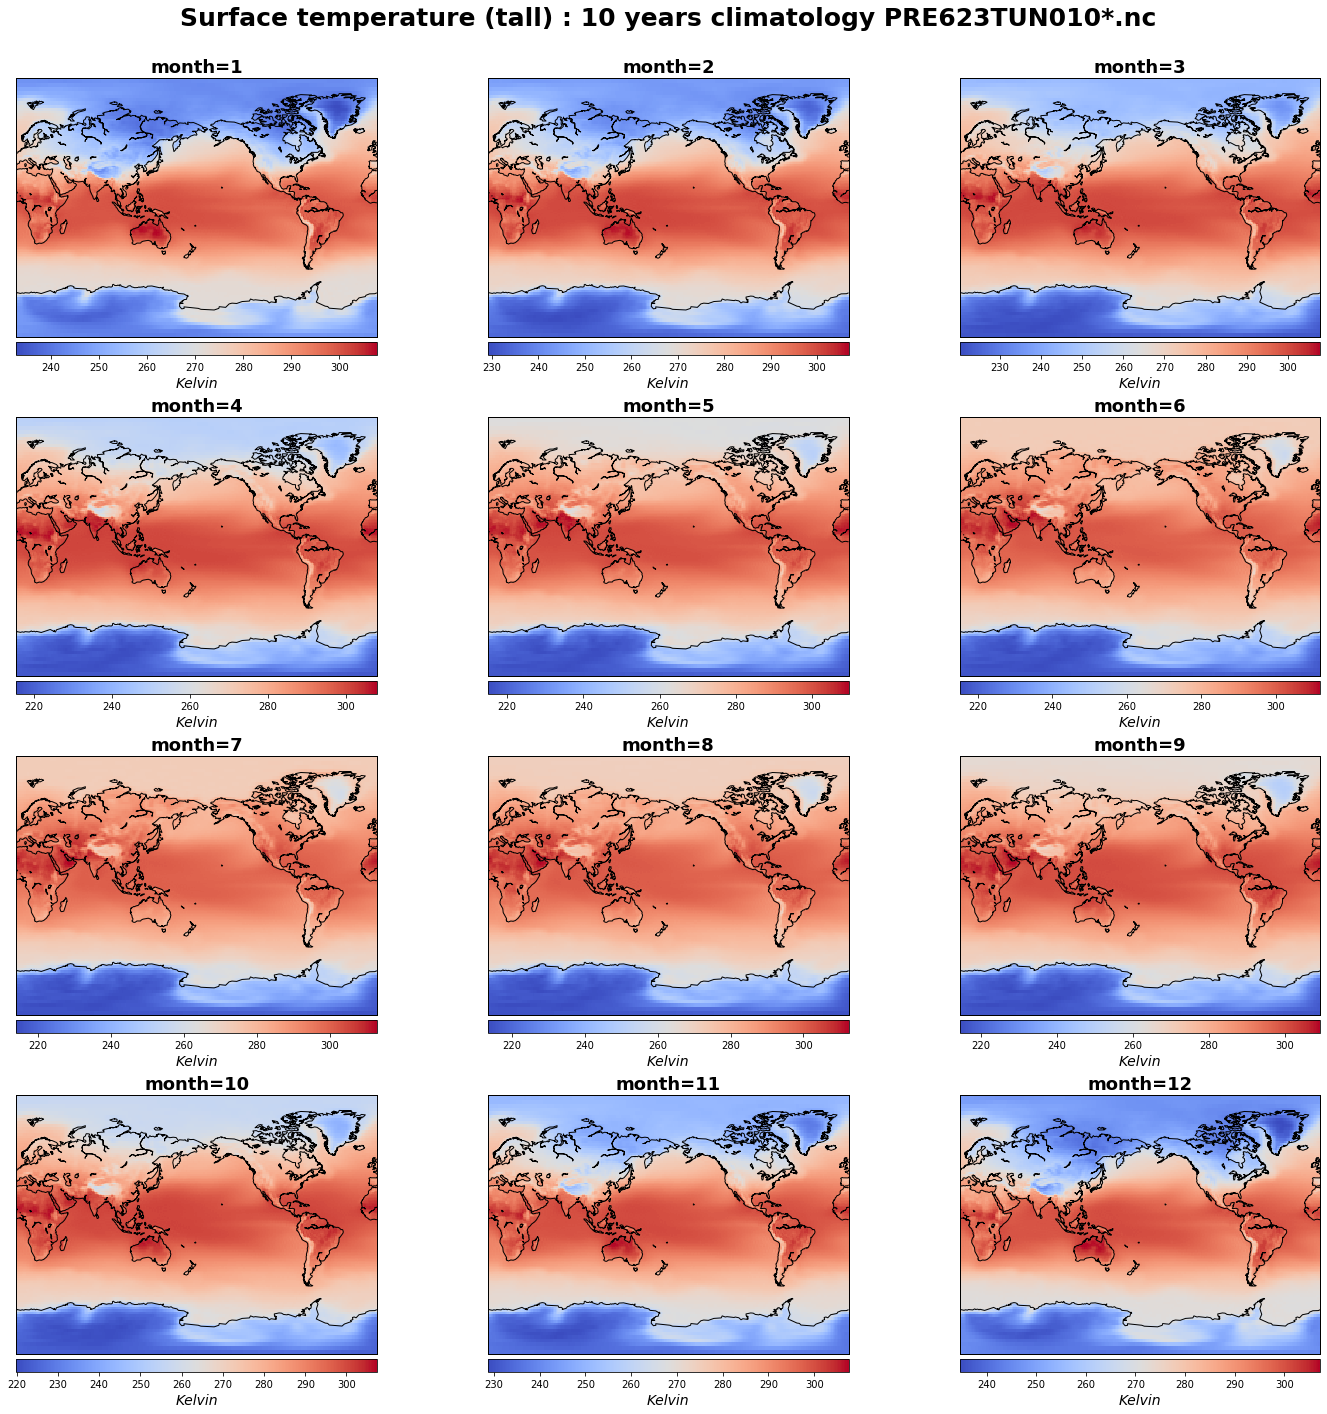

In [10]:
# set up the figure
fig = plt.figure()

#print(file.variables)
lat = clim.variables['lat'][:]
lon = clim.variables['lon'][:]

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(20, 20) )

# boucle pour céer les figures:
i=0
p=1
while i < 12:
    ax = fig.add_subplot(4,3,p)
    data = clim.variables['tall'][i,:,:]
    k=str(p)
    ax.set_title("month="+k, fontsize=18, fontweight = 'bold')
    m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
        urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
        resolution='c')
    x, y = m(*np.meshgrid(lon,lat))
    m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform')
    #cbar.set_ticks(np.arange(230,10,300))
    cbar.set_label ('Kelvin', size = 14, style = 'italic')
    m.drawcoastlines()
    m.drawmapboundary()
    i = i+1
    p = p + 1

fig.suptitle('Surface temperature (tall) : 10 years climatology PRE623TUN010*.nc', fontsize=25, fontweight = 'bold')
fig.tight_layout()
fig.subplots_adjust(top=0.93)
